In [ ]:
!pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import os
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# === Configuration ===
file_path = "_CR HDJ 13.xlsx"
skip_rows = 5  #actual data seems to start from row 6 (0-indexed row 5)
check_interval_seconds = 30  # How often to check for updates

In [ ]:
# === Function to Read and Clean Excel File ===
def read_excel_file(path):
    try:
        # Read the Excel file, skipping metadata/header rows
        df = pd.read_excel(path, skiprows=skip_rows)
        
        # Set first column as index (if desired, optional)
        if df.columns[0] != 'Unnamed: 0':
            df.set_index(df.columns[0], inplace=True)

        # Clean column names
        df.columns = [str(col).strip() for col in df.columns]

        # Print a preview
        print(f"\n[INFO] Data loaded - {df.shape[0]} rows, {df.shape[1]} columns")
        print(df.head(3))
        return df

    except Exception as e:
        print(f"[ERROR] Could not read file: {e}")
        return None

# === Main Monitoring Loop ===
def monitor_file(path):
    print(f"Monitoring file: {path}")
    last_modified = None

    while True:
        if os.path.exists(path):
            modified_time = os.path.getmtime(path)

            if last_modified is None or modified_time != last_modified:
                print(f"\n[INFO] Detected file change or first load...")
                df = read_excel_file(path)
                last_modified = modified_time

        else:
            print(f"[WARNING] File not found: {path}")

        time.sleep(check_interval_seconds)


In [ ]:
# === Run ===
#if __name__ == "__main__":
    #monitor_file(file_path)

In [ ]:
df = pd.read_excel("_CR HDJ 13.xlsx", skiprows=5)
print(df.head(3))
df.index.tolist()

                    Details           Unnamed: 1           Unnamed: 2  \
0  Date de naissance jjmmaa  1960-10-17 00:00:00  1961-03-18 00:00:00   
1               Genre H/F/I                    H                    H   
2                Téléphone        06 52 89 40 45       06 18 95 75 36   

            Unnamed: 3           Unnamed: 4           Unnamed: 5  \
0  1958-02-11 00:00:00  1974-01-13 00:00:00  1971-06-20 00:00:00   
1                    F                    F                    F   
2       01 75 29 45 54       06 86 21 65 62       06 12 86 39 37   

            Unnamed: 6           Unnamed: 7           Unnamed: 8  \
0  2003-11-10 00:00:00  1956-06-04 00:00:00  1949-10-10 00:00:00   
1                    F                    H                    H   
2       07 83 21 41 57       06 72 47 98 51       06 64 09 78 68   

            Unnamed: 9  ... Unnamed: 142 Unnamed: 143 Unnamed: 144  \
0  1970-02-06 00:00:00  ...          NaN          NaN          NaN   
1                    

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


### Ages :

Ages: [64.0, 64.0, 67.0, 51.0, 53.0, 21.0, 69.0, 75.0, 55.0, 56.0, 55.0, 46.0, 68.0, 67.0, 55.0, 66.0, 41.0, 52.0, 76.0, 27.0]
Average Age: 56.40
Standard Deviation: 14.12


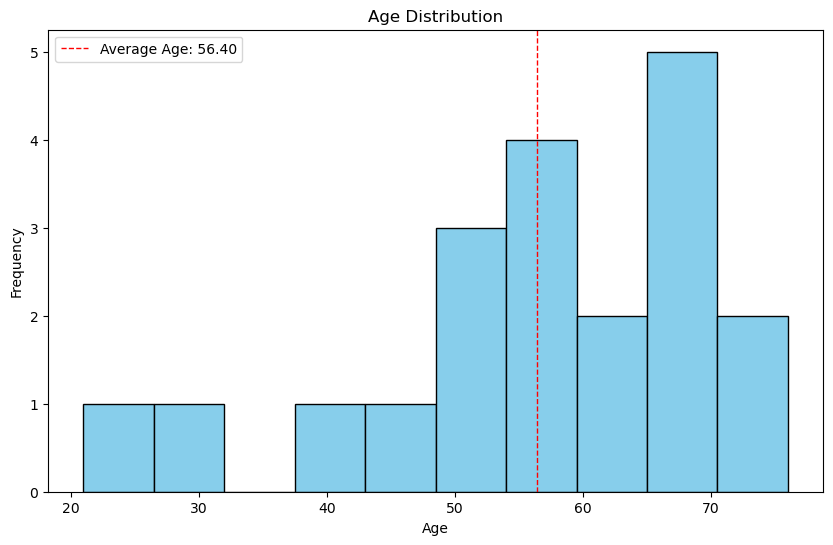

In [ ]:
# Load the Excel file (no header)
df = pd.read_excel(file_path, header=None)

# Get the 7th row (index 6)
birthdates_row = df.iloc[6, :]

# Define today's date
from datetime import datetime
today = datetime.today()

# Function to calculate age
def calculate_age(birth_str):
    try:
        birth_date = pd.to_datetime(birth_str, dayfirst=True, errors='coerce')
        if pd.isnull(birth_date):
            return np.nan
        age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
        return age
    except:
        return np.nan

# Apply the function and drop NaNs
ages = birthdates_row.apply(calculate_age).dropna()

# Calculate statistics
average_age = np.mean(ages)
std_age = np.std(ages)

print("Ages:", ages.tolist())
print(f"Average Age: {average_age:.2f}")
print(f"Standard Deviation: {std_age:.2f}")

# === Visualization ===
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1, label=f'Average Age: {average_age:.2f}')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Genre :

Found 'Genre H/F/I' at row 7
Filtered gender counts: {'Female': 11, 'Male': 9}


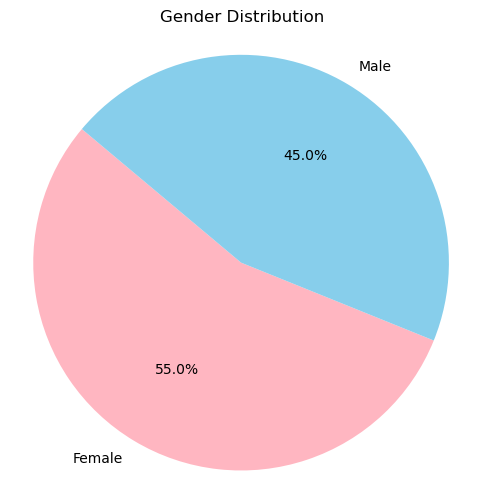

In [ ]:
# Load Excel file
df = pd.read_excel(file_path, header=None)

# Step 1: Find the row where 'Genre H/F/I' appears in column 0 (first column)
target = "Genre H/F/I"
match_row = df[df[0].astype(str).str.strip().str.lower() == target.lower()]

if not match_row.empty:
    row_idx = match_row.index[0]
    print(f"Found 'Genre H/F/I' at row {row_idx}")

    # Step 2: Extract gender values from that row, from column 1 onward
    gender_row = df.iloc[row_idx, 1:].dropna().astype(str).str.strip()

    # Step 3: Count occurrences
    label_map = {'H': 'Male', 'F': 'Female', 'I': 'Unknown'}
    counts = gender_row.value_counts()
    filtered_counts = counts[counts.index.isin(label_map.keys())]
    filtered_counts.index = filtered_counts.index.map(label_map)

    print("Filtered gender counts:", filtered_counts.to_dict())

    # Step 4: Plot
    if not filtered_counts.empty:
        colors = ['lightpink','skyblue', 'lightgray']
        plt.figure(figsize=(6, 6))
        plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%',
                colors=colors, startangle=140)
        plt.title('Gender Distribution')
        plt.axis('equal')
        plt.show()
    else:
        print("No valid gender entries (H, F, I) found to plot.")
else:
    print("'Genre H/F/I' not found in column 0.")


### Descriptive statistics by diabetes type:

In [ ]:
# Load Excel file
df = pd.read_excel(file_path, header=None)

# --- Step 1: Find the row for "Age du diabète (années)"
label1 = "Age du diabète (années)"
row1 = df[df[0].astype(str).str.strip().str.lower() == label1.lower()]
if row1.empty:
    raise ValueError(f"Label '{label1}' not found.")
idx_age = row1.index[0]

# --- Step 2: Get the next row for "Type de diabète 1/2/AT"
label2 = "Type de diabète 1/2/AT"
if not df.iloc[idx_age + 1, 0].strip().lower() == label2.lower():
    raise ValueError(f"Expected '{label2}' at row {idx_age + 1}. Found: {df.iloc[idx_age + 1, 0]}")
idx_type = idx_age + 1

# --- Step 3: Read the values (skip column 0 which is just the label)
age_values = df.iloc[idx_age, 1:].astype(str).str.strip()
type_values = df.iloc[idx_type, 1:].astype(str).str.strip()

# --- Step 4: Filter out "NON DIAB" and align with diabetes types
valid_mask = age_values.str.upper() != "NON DIAB"
age_numeric = pd.to_numeric(age_values[valid_mask], errors='coerce')
diabetes_types = type_values[valid_mask]

# Create DataFrame of valid data
data = pd.DataFrame({
    "AgeOnset": age_numeric,
    "Type": diabetes_types
}).dropna()

# Map type codes for clarity
type_map = {'1': 'Type 1', '2': 'Type 2', 'AT': 'Atypical'}
data = data[data['Type'].isin(type_map.keys())]
data['Type'] = data['Type'].map(type_map)

# --- Step 5: Generate descriptive stats
grouped = data.groupby("Type")["AgeOnset"].agg(['count', 'mean', 'std', 'min', 'max']).round(2)

# Print results
print("Descriptive statistics by diabetes type:")
print(grouped)


Descriptive statistics by diabetes type:
        count   mean   std   min   max
Type                                  
Type 1      7  28.29  8.85  17.0  40.0
Type 2     11  15.36  8.45   1.0  26.0


This table summarizes the age of diabetes onset for two different types of diabetes (Type 1 and Type 2). Each row represents a diabetes type, and each column shows a statistical measure based on the patients in that group.

#### Type 1 Diabetes:
- 7 patients with valid age data.

- The average age of onset is 28.29 years.

- The spread (standard deviation) is 8.85, which means ages vary quite a bit.

- The youngest onset was 17 years, and the oldest was 40 years.

#### Type 2 Diabetes :
- 11 patients with valid data.

- The average age of onset is 15.36 years, which is unusually young for Type 2 — possibly due to pediatric or early-onset cases.

- The standard deviation is 8.45, still showing a wide range.

- The youngest onset was just 1 year, and the oldest was 26 years.

⚠️ Note: Type 2 diabetes typically occurs later in life. So the very young ages here (like 1 year) might reflect misclassification, special cases (e.g., MODY), or data entry errors — it might be worth double-checking those.

### BMI :

In [ ]:
# --- Step 1: Locate BMI row
bmi_label = "BMI (poids[kg] / taille[m]2)"
bmi_row = df[df[0].astype(str).str.strip().str.lower() == bmi_label.lower()]

if bmi_row.empty:
    raise ValueError(f"Label '{bmi_label}' not found.")
bmi_idx = bmi_row.index[0]

# --- Step 2: Get values (skip label column)
bmi_values = df.iloc[bmi_idx, 1:].astype(str).str.strip()

# --- Step 3: Convert to numeric and drop non-numeric/NaN
bmi_numeric = pd.to_numeric(bmi_values, errors='coerce').dropna()

# --- Step 4: Descriptive statistics
stats = bmi_numeric.describe().round(2)

print("📊 Descriptive statistics for BMI:")
print(stats)


📊 Descriptive statistics for BMI:
count    17.00
mean     26.21
std       5.19
min      18.13
25%      22.21
50%      25.64
75%      30.43
max      35.00
Name: 19, dtype: float64


- The mean BMI (26.21) falls in the overweight category (25–29.9).

- The median (25.64) being slightly lower than the mean suggests the data is slightly right-skewed — a few higher BMIs raise the average.

- The range goes from 18.13 (normal weight) to 35.00 (obese).

- The IQR (Interquartile Range) is 30.43 - 22.21 = 8.22, showing moderate variability in BMI values.

### Hba1c and Insulin :

In [ ]:
# --- Step 1: Locate Hba1c row
label_hba1c = "Hba1c"
row_hba1c = df[df[0].astype(str).str.strip().str.lower() == label_hba1c.lower()]
if row_hba1c.empty:
    raise ValueError(f"Label '{label_hba1c}' not found.")
idx_hba1c = row_hba1c.index[0]
hba1c_vals = df.iloc[idx_hba1c, 1:].astype(str).str.strip()

# --- Step 2: Locate Insulin use row
label_insulin = "Insuline (Y/N)"
row_insulin = df[df[0].astype(str).str.strip().str.lower() == label_insulin.lower()]
if row_insulin.empty:
    raise ValueError(f"Label '{label_insulin}' not found.")
idx_insulin = row_insulin.index[0]
insulin_vals = df.iloc[idx_insulin, 1:].astype(str).str.strip().str.upper()

# --- Step 3: Create DataFrame and clean
data = pd.DataFrame({
    "Hba1c": pd.to_numeric(hba1c_vals, errors='coerce'),
    "Insulin": insulin_vals
}).dropna()

# Filter insulin responses to valid Y/N only
data = data[data["Insulin"].isin(["Y", "N"])]

# --- Step 4: Group and describe
grouped = data.groupby("Insulin")["Hba1c"].agg(['count', 'mean', 'std', 'min', 'median', 'max']).round(2)

# Rename index for clarity
grouped.index = grouped.index.map({'Y': 'Yes (Insulin)', 'N': 'No Insulin'})

print("📊 Hba1c Descriptive Stats by Insulin Usage:")
print(grouped)


📊 Hba1c Descriptive Stats by Insulin Usage:
               count  mean   std  min  median   max
Insulin                                            
No Insulin         4  7.38  1.44  6.3    6.85   9.5
Yes (Insulin)     13  7.90  1.23  6.2    7.80  10.4


This table compares HbA1c levels (a measure of long-term blood sugar control) between two groups:

- People not using insulin

- People using insulin

##### No Insulin (n = 4):
- Average HbA1c: 7.38%, which is slightly above the recommended target (usually <7%).

- Median is slightly lower (6.85%), meaning more than half are closer to target.

- Range: from 6.3% to 9.5% — some individuals still have high HbA1c.

##### Yes (Insulin) (n = 13):
- Average HbA1c: 7.90% — a bit higher than the no-insulin group.

- Median: 7.80% — very close to the mean, indicating symmetric distribution.

- Range: 6.2% to 10.4% — includes patients with relatively good control and others with quite poor control.

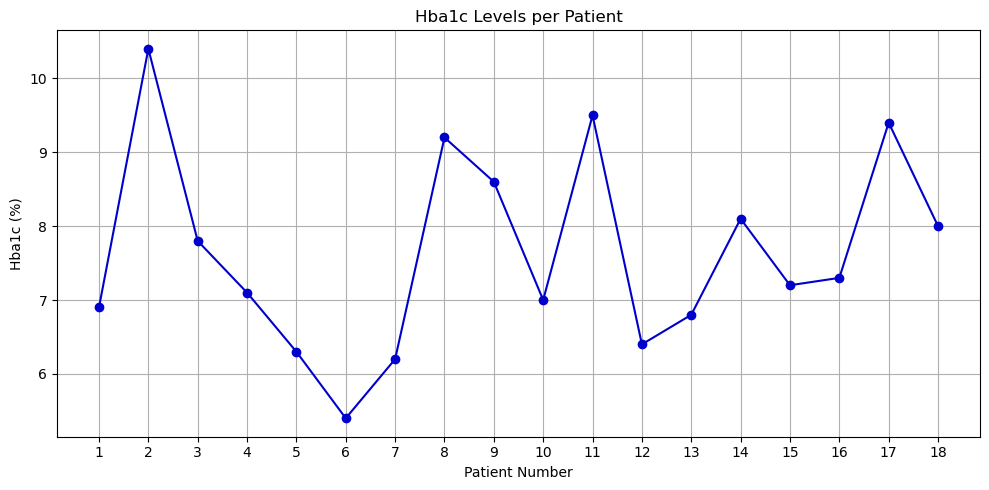

In [ ]:
# --- Step 1: Locate Hba1c row
label_hba1c = "Hba1c"
row_hba1c = df[df[0].astype(str).str.strip().str.lower() == label_hba1c.lower()]
if row_hba1c.empty:
    raise ValueError(f"Label '{label_hba1c}' not found.")
idx_hba1c = row_hba1c.index[0]

# --- Step 2: Extract numeric Hba1c values
hba1c_vals = pd.to_numeric(df.iloc[idx_hba1c, 1:], errors='coerce').dropna().reset_index(drop=True)

# --- Step 3: Set patient numbers as 1 to N
patient_numbers = range(1, len(hba1c_vals) + 1)

# --- Step 4: Plot
plt.figure(figsize=(10, 5))
plt.plot(patient_numbers, hba1c_vals, marker='o', linestyle='-', color='mediumblue')

# Labels and styling
plt.xlabel("Patient Number")
plt.ylabel("Hba1c (%)")
plt.title("Hba1c Levels per Patient")
plt.grid(True)
plt.xticks(patient_numbers)  # Optional: show every patient number
plt.tight_layout()
plt.show()


- HbA1c levels vary across patients, with some showing higher values (e.g., Patient 2 at ~10%, Patient 11 at ~10%) and others lower (e.g., Patient 5 at ~6%).
- There is no consistent trend; levels fluctuate, indicating individual differences in blood sugar control.
- Patients 2, 11, and 17 have the highest levels (~9-10%), while Patients 5 and 6 have the lowest (~6%).

### Grade de risque IWGDF :
(International Working Group on the Diabetic Foot) 

🚦 What is the “IWGDF Risk Grade”?
It’s a grading system used to assess a diabetic patient’s risk of developing a foot ulcer based on certain risk factors, such as:
- Peripheral neuropathy
- Foot deformities
- Previous foot ulcers
- Poor glycemic control
- Vascular disease
- The IWGDF Risk Grade helps healthcare providers determine the level of care and monitoring needed to prevent foot complications in diabetic patients.

In [ ]:
grade_meaning = {
    0: "Low risk — Normal sensation, no PAD, no deformity",
    1: "Moderate risk — Neuropathy or PAD, but no deformity or ulcer history",
    2: "High risk — Neuropathy plus PAD or deformity",
    3: "Very high risk — Previous foot ulcer or amputation"
}
grade = pd.DataFrame.from_dict(grade_meaning, orient='index', columns=['Meaning'])
grade.index.name = 'Grade'
display(grade)

,Meaning
Grade,
0,"Low risk — Normal sensation, no PAD, no deformity"
1,"Moderate risk — Neuropathy or PAD, but no defo..."
2,High risk — Neuropathy plus PAD or deformity
3,Very high risk — Previous foot ulcer or amputa...


IWGDF Grade: Ranges from 0 (low risk) to 3 (very high risk), with a mean of ~1.2.
Patients 6, 7, 8, 9, 10, 12, 15 show higher risk (grade 3).


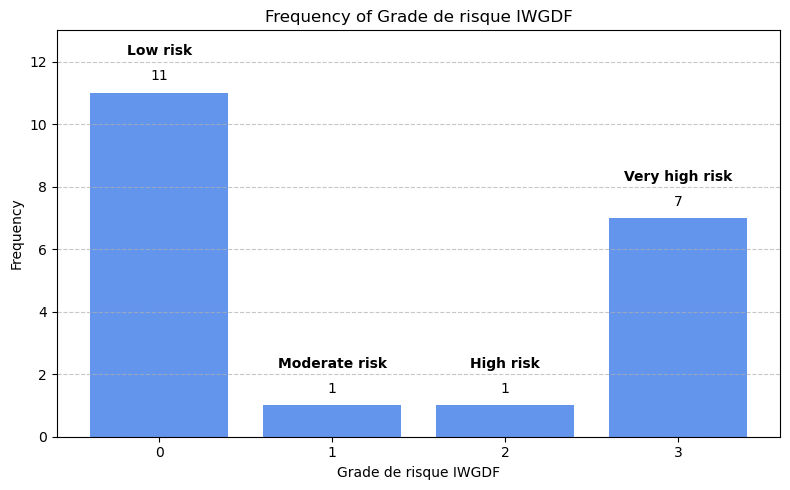

In [ ]:
# Load Excel file
file_path = "_CR HDJ 13.xlsx"
df = pd.read_excel(file_path, header=None)

label_risk = "Grade de risque IWGDF"
row_risk = df[df[0].astype(str).str.strip().str.lower() == label_risk.lower()]
if row_risk.empty:
    raise ValueError(f"Label '{label_risk}' not found.")
idx_risk = row_risk.index[0]

risk_values = pd.to_numeric(df.iloc[idx_risk, 1:], errors='coerce').dropna().astype(int)

min_iwgdf = risk_values.min()
max_iwgdf = risk_values.max()
mean_iwgdf = risk_values.mean()

high_risk_patients = risk_values[risk_values == 3].index + 1

print(f"IWGDF Grade: Ranges from {min_iwgdf} (low risk) to {max_iwgdf} (very high risk), with a mean of ~{mean_iwgdf:.1f}.")
print(f"Patients {', '.join(map(str, high_risk_patients.tolist()))} show higher risk (grade 3).")

all_grades = pd.Series(index=[0,1,2,3], data=0)
freq = all_grades.add(risk_values.value_counts(), fill_value=0).astype(int).sort_index()

risk_labels = {
    0: "Low risk",
    1: "Moderate risk",
    2: "High risk",
    3: "Very high risk"
}

plt.figure(figsize=(8,5))
bars = plt.bar(freq.index, freq.values, color='cornflowerblue')

for bar in bars:
    grade = int(bar.get_x() + 0.5)
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width()/2, height + 1.1, risk_labels.get(grade, ""), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Grade de risque IWGDF")
plt.ylabel("Frequency")
plt.title("Frequency of Grade de risque IWGDF")
plt.xticks(freq.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 13)  # <-- Set y-axis limit here
plt.tight_layout()
plt.show()


The mean IWGDF grade is approximately 1.2, suggesting that, on average, the patients fall between low and moderate risk.


⚠️  However, specific patients (6, 7, 8, 9, 10, 12, and 15) are identified as having a higher risk, all classified under Grade 3, indicating they have a very high risk due to previous foot ulcers or amputations. This highlights a subset of patients requiring more intensive care.

## Pressure values:

| Term                                                        | What it measures                                      | Normal Range   | Limb          |
| ----------------------------------------------------------- | ----------------------------------------------------- | -------------- | ------------- |
| MESI Pression gros orteil D norme 80-120 mmHg               | Absolute systolic pressure (mmHg) at right big toe    | 80-120 mmHg    | Right big toe |
| MESI Pression gros orteil G norme 80-120 mmHg               | Absolute systolic pressure (mmHg) at left big toe     | 80-120 mmHg    | Left big toe  |
| MESI Indice de Pression Systolique Gros Orteil D norme>0.70 | Toe-brachial systolic pressure ratio at right big toe | >0.70 (normal) | Right big toe |
| MESI Indice de Pression Systolique Gros Orteil G norme>0.70 | Toe-brachial systolic pressure ratio at left big toe  | >0.70 (normal) | Left big toe  |


In [ ]:
def get_numeric_row(df, label):
    # Find the row with matching label (case-insensitive, stripped)
    row = df[df[0].astype(str).str.strip().str.lower() == label.lower()]
    if row.empty:
        raise ValueError(f"Label '{label}' not found.")
    idx = row.index[0]
    # Convert to numeric, coercing errors, drop NaN
    numeric_vals = pd.to_numeric(df.iloc[idx, 1:], errors='coerce')
    return numeric_vals

                                               Label        Mean        Std  \
0      MESI Pression gros orteil D norme 80-120 mmHg  124.761741  40.712592   
1      MESI Pression gros orteil G norme 80-120 mmHg  132.861605  39.627074   
2  MESI Indice de Pression Systolique Gros Orteil...    0.986327   0.296554   
3  MESI Indice de Pression Systolique Gros Orteil...    1.047719   0.290981   

         Min     Max  
0  35.473562  182.00  
1  29.693304  188.00  
2   0.234803    1.45  
3   0.175784    1.32  


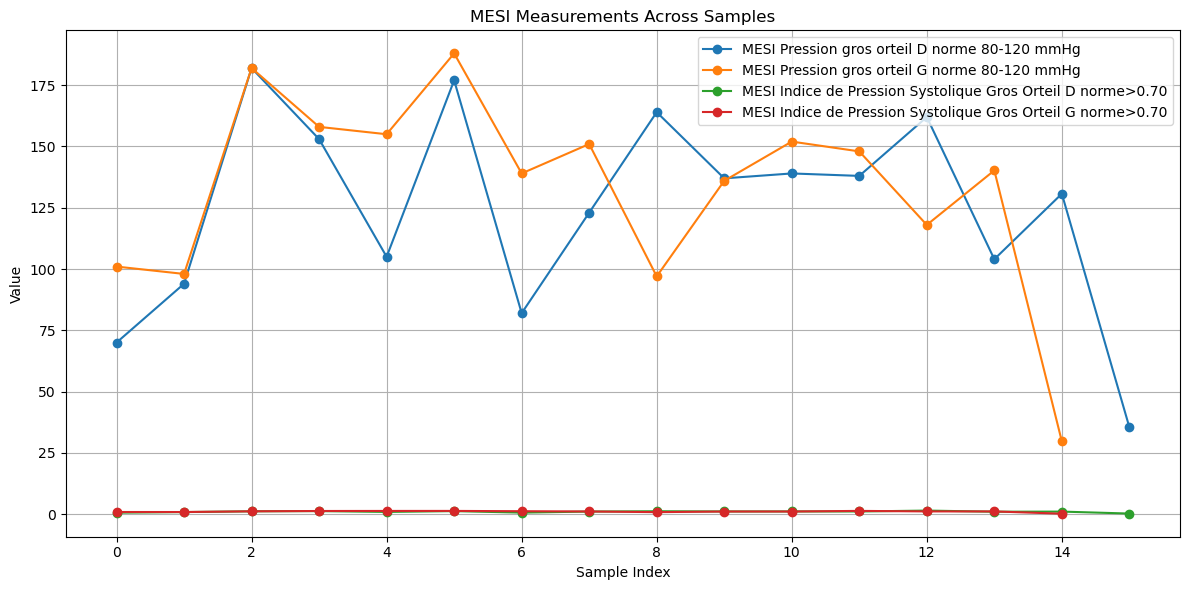

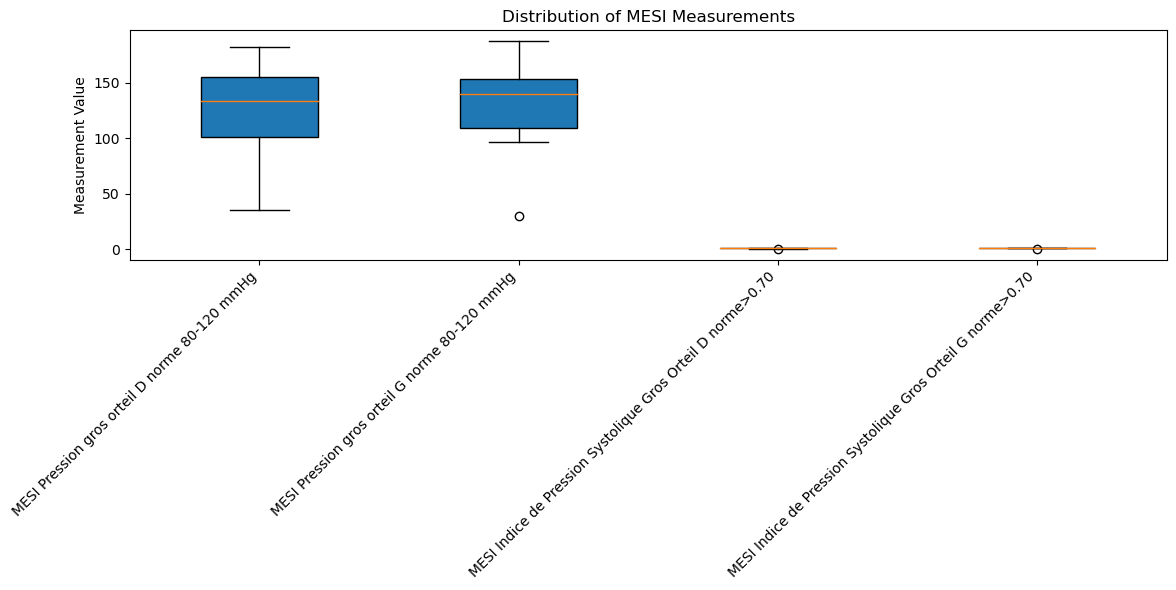

In [ ]:
labels_to_plot = [
    "MESI Pression gros orteil D norme 80-120 mmHg",
    "MESI Pression gros orteil G norme 80-120 mmHg",
    "MESI Indice de Pression Systolique Gros Orteil D norme>0.70",
    "MESI Indice de Pression Systolique Gros Orteil G norme>0.70",
]

data_dict = {}
summary_stats = []

for label in labels_to_plot:
    try:
        data = get_numeric_row(df, label).dropna()
        data_dict[label] = data.values

        summary_stats.append({
            "Label": label,
            "Mean": data.mean(),
            "Std": data.std(),
            "Min": data.min(),
            "Max": data.max()
        })
    except Exception as e:
        print(f"Error retrieving '{label}': {e}")

# Convert to DataFrame for stats
summary_df = pd.DataFrame(summary_stats)
print(summary_df)

# Plot line plot
plt.figure(figsize=(12, 6))
for label, values in data_dict.items():
    plt.plot(range(len(values)), values, marker='o', label=label)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('MESI Measurements Across Samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot boxplot
plt.figure(figsize=(12,6))
plt.boxplot([vals for vals in data_dict.values()], labels=data_dict.keys(), patch_artist=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Measurement Value')
plt.title('Distribution of MESI Measurements')
plt.tight_layout()
plt.show()

Line plot: shows how values for each MESI label change across samples (columns in your dataframe).

Boxplot: shows the spread, median, quartiles, and outliers of values for each MESI label, great for spotting differences in distribution.

There is significant variability in both toe pressures and TBI values(Toe-Brachial Index).

###### TBI  : It’s a non-invasive diagnostic ratio used to assess blood flow to the feet, especially useful when ABI (Ankle-Brachial Index) is unreliable (e.g., in diabetic patients with calcified arteries).

Minimum values for all indicators (especially pressures below 40 mmHg and TBIs < 0.4) could indicate poor peripheral perfusion or severe PAD in some patients.

Despite averages being within normal range, the spread (Std Dev) shows some patients are at serious risk.

#### 🧮 How is TBI Calculated?

$$\
\text{TBI} = \frac{\text{Toe systolic blood pressure}}{\text{Brachial (arm) systolic blood pressure}}
$$

---

#### 🧭 Normal and Abnormal Ranges

| **TBI Value** | **Interpretation**                                      |
|---------------|----------------------------------------------------------|
| > 0.70        | ✅ Normal – Good perfusion                               |
| 0.64 – 0.70   | ⚠️ Borderline                                            |
| < 0.64        | ❌ Abnormal – Indicates possible PAD                     |
| < 0.30        | 🚨 Critical ischemia – Very poor blood flow              |

---

#### 🩺 Why is TBI Important?

- In patients with **diabetes** or **kidney disease**, arteries are often **calcified**, which can make **ABI falsely high**.
- **Toe arteries are less likely to calcify**, so **TBI is a more reliable measure** of perfusion in such patients.
- A **low TBI** suggests increased risk of:
  -  Poor wound healing  
  -  Ulceration  
  -  Amputation


## Correlation with IWGDF Risk Grade:

In [ ]:
# Get numeric values for both rows
mesi_press = get_numeric_row(df, "MESI Pression gros orteil D norme 80-120 mmHg")
iwgdf_grade = get_numeric_row(df, "Grade de risque IWGDF")

# Align indices and drop any columns where either is NaN
data = pd.concat([mesi_press, iwgdf_grade], axis=1, keys=['MESI', 'IWGDF']).dropna()

# Calculate Pearson correlation
corr = data['MESI'].corr(data['IWGDF'])

print(f"Correlation between 'MESI Pression gros orteil D norme 80-120 mmHg' and 'Grade de risque IWGDF': {corr:.3f}")


Correlation between 'MESI Pression gros orteil D norme 80-120 mmHg' and 'Grade de risque IWGDF': -0.574


- MESI Pression gros orteil D norme 80-120 mmHg — which is a measurement of pressure on the big toe (from a MESI device), expected to be between 80 and 120 mmHg.

- Grade de risque IWGDF — which is the risk grade according to the IWGDF (International Working Group on the Diabetic Foot), a classification used to assess foot ulcer risk.

- The correlation coefficient between these two variables is -0.574.

#### What does that number mean?
Correlation ranges from -1 to +1.

-0.574 indicates a moderate negative correlation.

This means as the pressure on the big toe increases, the IWGDF risk grade tends to decrease (or vice versa).

In other words, higher toe pressure values might be associated with lower risk grades, or lower pressure might be linked with higher risk grades.

If the pressure on the toe is outside the normal range (too low or too high), it might indicate changes in blood flow or tissue health.

##### ⚠️ A negative correlation suggests that people with higher risk grades (more serious risk) may have lower toe pressure values.

## Correlation between grade de risque IWGDF and row 36 to row 39 (pressure values):

In [ ]:
labels_to_correlate = [
    "MESI Pression gros orteil D norme 80-120 mmHg",
    "MESI Pression gros orteil G norme 80-120 mmHg",
    "MESI Indice de Pression Systolique Gros Orteil D norme>0.70",
    "MESI Indice de Pression Systolique Gros Orteil G norme>0.70",
]

reference_label = "Grade de risque IWGDF"
reference_data = get_numeric_row(df, reference_label)

correlations = {}

for label in labels_to_correlate:
    try:
        row_data = get_numeric_row(df, label)
        combined = pd.concat([row_data, reference_data], axis=1, keys=[label, reference_label])
        combined = combined.dropna()
        corr = combined[label].corr(combined[reference_label])
        correlations[label] = corr
        print(f"Correlation between '{label}' and '{reference_label}': {corr:.3f}")
    except Exception as e:
        print(f"Error with label '{label}': {e}")


Correlation between 'MESI Pression gros orteil D norme 80-120 mmHg' and 'Grade de risque IWGDF': -0.574
Correlation between 'MESI Pression gros orteil G norme 80-120 mmHg' and 'Grade de risque IWGDF': -0.120
Correlation between 'MESI Indice de Pression Systolique Gros Orteil D norme>0.70' and 'Grade de risque IWGDF': -0.580
Correlation between 'MESI Indice de Pression Systolique Gros Orteil G norme>0.70' and 'Grade de risque IWGDF': 0.074


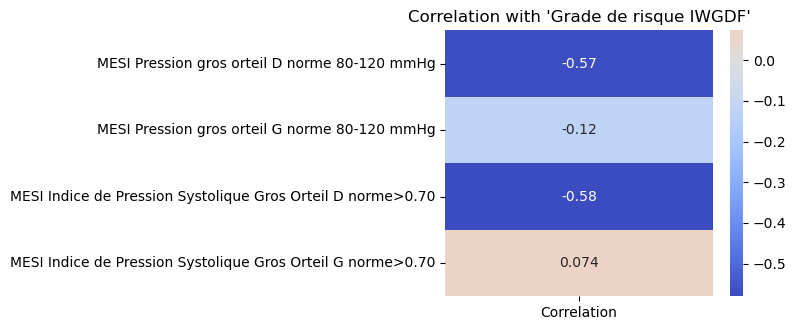

In [ ]:
# Heatmap plot
import seaborn as sns 

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
plt.figure(figsize=(8, len(labels_to_correlate)*0.6 + 1))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlation with '{reference_label}'")
plt.tight_layout()
plt.show()

#### 📊 Correlation Between MESI Measurements and IWGDF Risk Grade

| Measurement Label                                        | Correlation with IWGDF Grade | Interpretation                                                                          |
|----------------------------------------------------------|------------------------------|------------------------------------------------------------------------------------------|
| **MESI Pression gros orteil D** (Right big toe pressure) | **-0.574**                   | Moderate **negative** correlation – as pressure **decreases**, risk **increases**.      |
| **MESI Pression gros orteil G** (Left big toe pressure)  | **-0.120**                   | Very **weak negative** correlation – little meaningful relationship.                    |
| **MESI IPS Gros Orteil D** (Right toe-brachial index)    | **-0.580**                   | Moderate **negative** correlation – lower index values associated with **higher risk**. |
| **MESI IPS Gros Orteil G** (Left toe-brachial index)     | **+0.074**                   | Very **weak positive** correlation – no clear relationship.                             |

---

#### 📉 Clinical Interpretation

- **Stronger (negative) correlations** are seen on the **right foot** (pressure and index):
  - As perfusion or arterial health **worsens**, the IWGDF risk grade **increases**.
  - This aligns with vascular pathology progression and diabetic foot risk.

- **Weaker correlations on the left foot** may indicate:
  - **Measurement noise**, or
  - **Lower predictive value** of left foot metrics in this dataset.

---

#### 🧠 Summary

The **MESI values from the right big toe**, especially the **Toe-Brachial Index (TBI)**, show **moderate inverse correlation** with IWGDF diabetic foot risk.  
This suggests that lower pressure and lower index values are **meaningfully associated** with **higher clinical risk**, matching expectations in peripheral artery disease assessment
